# Study about Artificial Neural Networks
## Convolutional Neural Networks (CNN)
### Author: André Rizzo - USP - 2024


---   

<br>

### Load required libraries

In [25]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

### Load dataset  

For this study we will use **CIFAR-100** image dataset.  
CIFAR-100 is commonly used in Machine Learning for image classification tasks. It is an extension of CIFAR-10 but with more classes and complexity.  

<br>
#### **Dataset Details:**  
**Number of Classes:** 100 (e.g., "apple", "castle", "elephant").  
**Images per Class:** 600 images (500 training, 100 testing).  
**Total Images:** 60,000 (50,000 for training, 10,000 for testing).  
**Image Size:** 32x32 pixels in RGB (3 color channels).  

In [4]:
cifar = keras.datasets.cifar100

### Create train and test sets  

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

### Check dataset characteristics  

In [4]:
print("Images for training and shape (pixels):", train_images.shape)
print("Labels for training:", train_labels.shape)
print("Images for test and shape (pixels):", test_images.shape)
print("Labels for test:", test_labels.shape)

Images for training and shape (pixels): (50000, 32, 32, 3)
Labels for training: (50000, 1)
Images for test and shape (pixels): (10000, 32, 32, 3)
Labels for test: (10000, 1)


There are 50,000 images for training and 10,000 for test, each one with 32x32 pixels and all of them are colored.  
All images are labeled.

### View 30 images

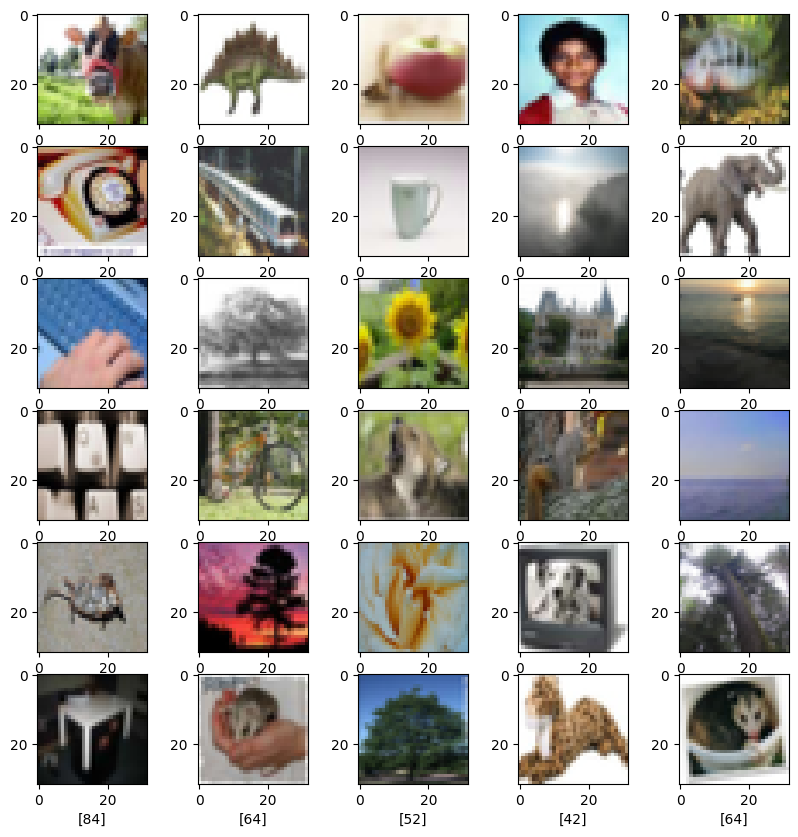

In [5]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])

As we can see images resolution are not good and some of them are almost unrecognizable.  

### View some individual images

array([[[156, 153, 147],
        [151, 151, 143],
        [158, 157, 152],
        ...,
        [145, 143, 130],
        [145, 142, 134],
        [146, 144, 137]],

       [[150, 148, 139],
        [150, 150, 139],
        [156, 155, 150],
        ...,
        [142, 141, 124],
        [147, 144, 134],
        [148, 148, 142]],

       [[145, 143, 134],
        [155, 154, 147],
        [157, 156, 151],
        ...,
        [143, 142, 125],
        [153, 151, 139],
        [152, 150, 145]],

       ...,

       [[139, 137, 125],
        [151, 150, 138],
        [150, 145, 134],
        ...,
        [154, 146, 129],
        [157, 150, 141],
        [160, 157, 151]],

       [[145, 140, 125],
        [149, 149, 138],
        [148, 143, 130],
        ...,
        [153, 144, 132],
        [155, 149, 138],
        [160, 156, 150]],

       [[150, 146, 132],
        [145, 144, 132],
        [150, 147, 133],
        ...,
        [160, 150, 143],
        [157, 151, 139],
        [148, 144, 132]]], dtype=uint8)
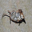

In [6]:
train_images[20]

array([[[ 90,  71,  49],
        [ 61,  45,  30],
        [ 38,  28,  20],
        ...,
        [ 93, 101,  70],
        [ 94,  99,  71],
        [101, 102,  78]],

       [[ 70,  46,  26],
        [ 49,  35,  27],
        [ 81,  79,  78],
        ...,
        [ 91,  93,  63],
        [ 89,  90,  60],
        [ 99,  99,  71]],

       [[ 58,  35,  21],
        [ 65,  55,  54],
        [163, 165, 169],
        ...,
        [127, 129, 115],
        [118, 119, 104],
        [107, 108,  91]],

       ...,

       [[172, 147, 101],
        [166, 141,  87],
        [179, 148,  86],
        ...,
        [150, 123,  70],
        [ 99,  79,  42],
        [ 76,  60,  34]],

       [[170, 144,  91],
        [170, 143,  87],
        [178, 146,  86],
        ...,
        [151, 121,  70],
        [ 99,  76,  37],
        [ 67,  50,  20]],

       [[169, 139,  88],
        [168, 139,  84],
        [180, 145,  86],
        ...,
        [152, 119,  69],
        [122,  95,  52],
        [105,  84,  43]]], dtype=uint8)
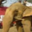

In [7]:
train_images[20000]

---

<br>

### Pre-processing

#### RGB color schema
To understand what will be done, let's delve into the RGB color scheme.  

The RGB (Red, Green, Blue) standard is an additive model used to represent colors by combining three primary colors: red, green, and blue. It is widely used in digital displays, such as monitors, televisions, and cameras, because these devices emit light to create colors.  

#### Color Representation in RGB  
In the RGB model, each color is represented by three values corresponding to the intensity of red, green, and blue.  
These values range from 0 to 255 for each color.
Example:  
* RGB(255, 0, 0) - Pure or 100% red  
* RGB(0, 255, 0) - Pure or 100% green  
* RGB(0, 0, 255) - Pure or 100% blue  

But it is possible to have also combination os two or more colors to form a third one.  
Example:  
* RGB(255, 255, 255): Pure or 100% white
* RGB(0, 0, 0): Black
* RGB(128, 128, 0): Half red and half green that is light yellow.  

<br>

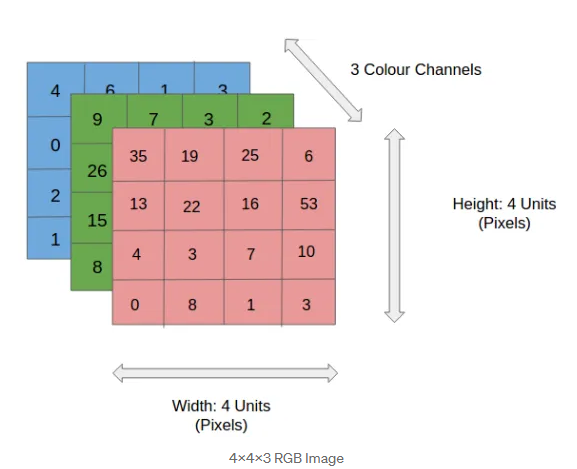  

###### Fonte: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

<br>

#### Normalization


In [6]:
train_images = train_images / 255
test_images = test_images / 255

It is clear that normalization is essential in the training of Artificial Neural Networks. After the introduction to RGB above, it becomes evident that if the maximum intensity for each color is 255, dividing all color values by 255 will transform the range from [0, 255] to [0, 1].

<br>

---

### CNN Model training

Before start modeling, let's take a deeper look in what Convolutional Neural Networks (CNNs) are.  

In a previous study (https://github.com/andrerizzo/Digit_Recognition_MLP), I showed that Multilayer Perceptrons (MLPs) are effective at recognizing handwritten digits. So, why not use MLPs here?

The answer lies in the complexity of the images. As images become more complex, the accuracy of MLPs decreases significantly.

But why does this happen? The explanation is not straightforward, but we can say that while MLPs are good at identifying general patterns, they struggle to analyze detailed features within images.  

So, how to solve this problem ?  The answer is the CNNs !  

#### **Overview os CNNs**  
CNNs (Convolutional Neural Networks) are a type of artificial neural network specifically designed for processing structured grid-like data, such as images. They are particularly powerful for tasks in computer vision, including image classification, object detection, and segmentation, but are also used in other domains like natural language processing and signal analysis.  
<br>

**What Makes CNNs Unique?**  
CNNs are inspired by the structure of the visual cortex in animals and excel at extracting spatial hierarchies of patterns in data. Unlike traditional neural networks, CNNs can automatically and adaptively learn spatial hierarchies of features, such as edges, textures, and complex structures, from images or other structured data.  
<br>

#### **Key Components of CNNs**  

1. **Convolutional Layers:**

- These layers apply convolutional operations to the input. But what is convolution ? It involves sliding a filter (or kernel) over the input data to extract features like edges, corners, or textures.  
- The output of this operation is called a feature map.  

  **Key Parameters:**  
  *Kernel size:* Dimensions of the filter (e.g., 3x3 or 5x5).  
  *Stride:* How far the filter moves across the input at each step.  
  *Padding:* Adding extra borders around the input to control the spatial size of the output.  

2. **Activation Function:**  

  Non-linear activation functions (e.g., ReLU) are applied to introduce non-linearity into the model, enabling it to learn complex patterns.  

3. **Pooling Layers:**  

  These layers reduce the spatial dimensions of the feature maps (e.g., height and width) while retaining important information.  

  Types:  
  Max pooling: Takes the maximum value in a pooling window (e.g., 2x2).  
  Average pooling: Takes the average value in a pooling window.  

  Benefits:  
  Reduces computational cost, controls overfitting, and retains essential features.  

4. **Fully Connected Layers (Dense Layers):**  

  After feature extraction, the output is flattened and passed through one or more fully connected layers to make final predictions.  
  This layer combines features learned by the convolutional layers for classification or regression tasks.  

5. **Dropout (Optional):**

  Regularization technique to prevent overfitting by randomly setting a fraction of the layer’s neurons to zero during training.












<br>

#### Visualmente uma CNN pode ser entendida da seguinte forma:  

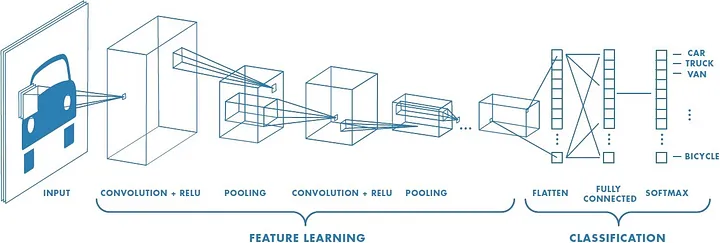  

###### Fonte: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53  

---

### Model 1

#### Creation

In [9]:
model = keras.Sequential()

# 1st convolutional layer
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
# 1st pooling layer
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# 2nd convolutional layer
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
# 2nd pooling layer
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# 3rd convolutional layer
model.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
# 3rd pooling layer
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1024, activation='relu'))

model.add(keras.layers.Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Model overview

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,459,300 (9.38 MB)

 Trainable params: 2,459,300 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Model training

In [11]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.0746 - loss: 4.0940
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2517 - loss: 3.0179
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3544 - loss: 2.5266
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4369 - loss: 2.1398
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5283 - loss: 1.7524
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6234 - loss: 1.3508
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7183 - loss: 0.9771
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7992 - loss: 0.6811
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8503 - loss: 0.4921
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8834 - loss: 0.3815


#### Model accuracy and loss

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nModel loss using test set:', test_loss)
print('\nModel accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3248 - loss: 5.1425

Model loss using test set: 5.1105451583862305

Model accuracy using test set: 0.3224000036716461


It seems that overfitting is happening, because accuracy during training was 0.88 but with test set it was reduced to 0.32.  
In order to check it, I will use a validation set and analyse training vs validation accuracy.  


In [13]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8970 - loss: 0.3291 - val_accuracy: 0.8634 - val_loss: 0.4438
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9256 - loss: 0.2369 - val_accuracy: 0.7847 - val_loss: 0.7211
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9289 - loss: 0.2247 - val_accuracy: 0.7631 - val_loss: 0.8380
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9384 - loss: 0.1961 - val_accuracy: 0.7385 - val_loss: 0.9964
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9365 - loss: 0.2100 - val_accuracy: 0.6970 - val_loss: 1.2469
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9420 - loss: 0.1864 - val_accuracy: 0.6765 - val_loss: 1.4741
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9468 - loss: 0.1730 - val_accuracy: 0.6635 - val_loss: 1.6172
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9499 - loss: 0.1634 - 

In [14]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

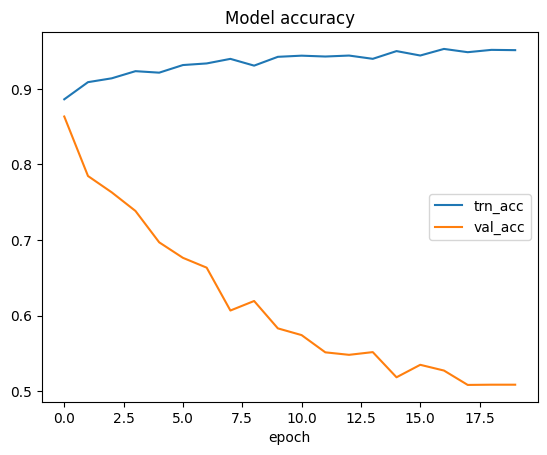

In [15]:
plt.title('Model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

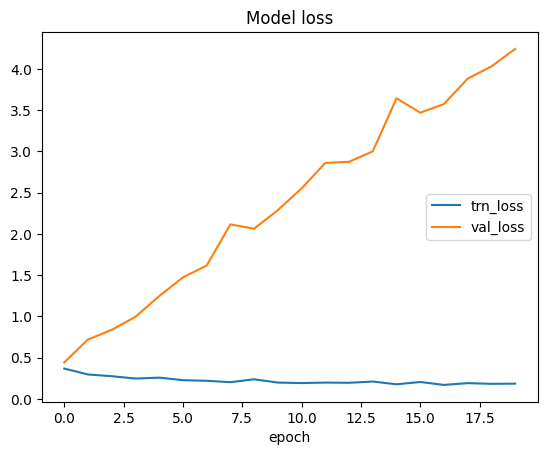

In [16]:
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

In [17]:
#keras.models.save_model(model, 'CNN_v1.keras')
#files.download('CNN_v1.keras')

In [18]:
#keras.models.load_model('CNN_v1.keras')

<br>

---

### Model 2  

* Added 2 hidden convolutional layers

In [30]:
model2 = keras.Sequential()


model2.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu') )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model2.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding='same',
                               activation='relu') )

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(1024, activation='relu'))
model2.add(keras.layers.Dense(100, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 2, 2, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,556,068 (25.01 MB)

 Trainable params: 6,556,068 (25.01 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history2 = model2.fit(train_images, train_labels, epochs=20, validation_split=0.20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0265 - loss: 4.4113 - val_accuracy: 0.0734 - val_loss: 3.9615
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0966 - loss: 3.8219 - val_accuracy: 0.1285 - val_loss: 3.6517
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1682 - loss: 3.4160 - val_accuracy: 0.1835 - val_loss: 3.3456
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2164 - loss: 3.1550 - val_accuracy: 0.2165 - val_loss: 3.1689
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2638 - loss: 2.9272 - val_accuracy: 0.2376 - val_loss: 3.0928
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3006 - loss: 2.7380 - val_accuracy: 0.2568 - val_loss: 3.0217
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3336 - loss: 2.5606 - val_accuracy: 0.2649 - val_loss: 3.0266
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3737 - loss: 2.3526 -

In [33]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('\nModel 2 loss using test set:', test_loss)
print('\nModel 2 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2513 - loss: 5.8291

Model 3 loss using test set: 5.889214992523193

Model 3 accuracy using test set: 0.25769999623298645


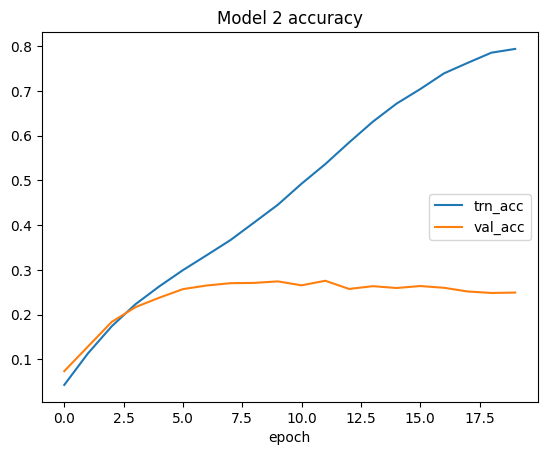

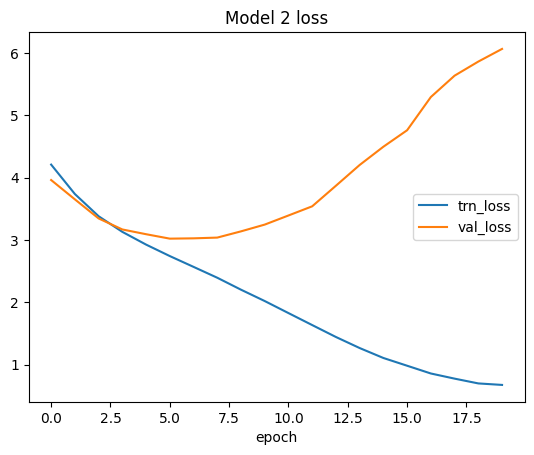

In [34]:
plt.title('Model 2 accuracy')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('Model 2 loss')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

It didn't work because validation accuracy remained low when compared to training accuracy.  




<br>

---
### Model 3

Changes:
1. Reduce the complexity of the CNN, using only 3 convolutional hidden layers.
2. Use *dropout* before dense hidden layers.
3. Use *batch normalization* before convolutional hidden layers.

In [23]:
model3 = keras.Sequential()

model3.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model3.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model3.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(1024, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(100, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,196 (9.38 MB)

 Trainable params: 2,459,748 (9.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
history3 = model3.fit(train_images, train_labels, epochs=20, validation_split=0.20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9101 - loss: 0.2829 - val_accuracy: 0.4079 - val_loss: 3.5112
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9111 - loss: 0.2835 - val_accuracy: 0.4237 - val_loss: 3.4987
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9201 - loss: 0.2573 - val_accuracy: 0.4285 - val_loss: 3.6186
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9185 - loss: 0.2473 - val_accuracy: 0.3953 - val_loss: 3.7256
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9275 - loss: 0.2287 - val_accuracy: 0.4097 - val_loss: 3.6406
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9271 - loss: 0.2308 - val_accuracy: 0.4018 - val_loss: 4.0217
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9308 - loss: 0.2178 - val_accuracy: 0.4375 - val_loss: 3.6713
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9341 - loss: 0.2150 - 

In [28]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('\nModel 3 loss using test set:', test_loss)
print('\nModel 3 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4462 - loss: 3.8545

Model 3 loss using test set: 3.8784871101379395

Model 3 accuracy using test set: 0.4413999915122986


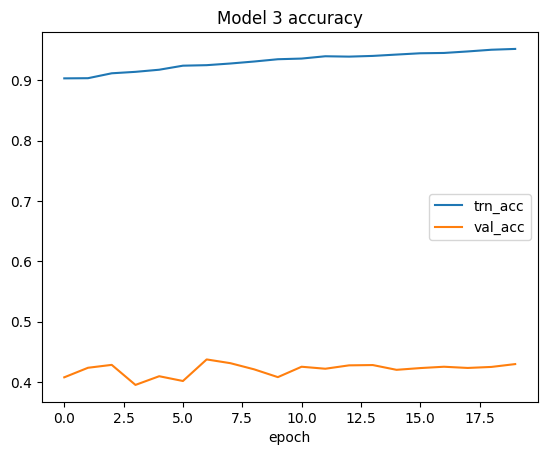

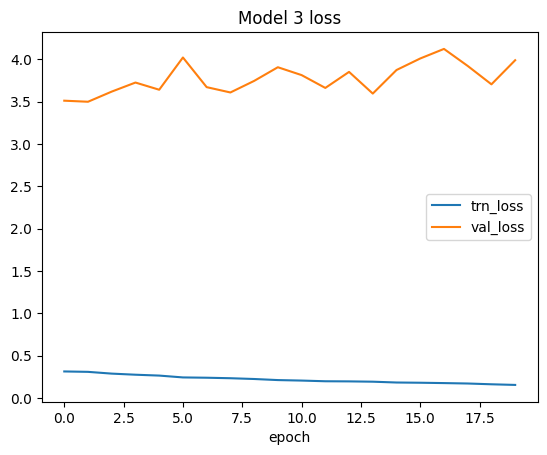

In [29]:
plt.title('Model 3 accuracy')
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('Model 3 loss')
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Model 3 performed better than model 2, but more improvements will be necessary.  


<br>

---

### Model 4  

Changes:

* Add regularization factor to activation functions

In [38]:
model4 = keras.Sequential()

model4.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', kernel_regularizer=l2(0.001),
                               input_shape=(32,32,3)))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu', kernel_regularizer=l2(0.001)))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu', kernel_regularizer=l2(0.001)) )
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.Dense(100, activation='softmax'))

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,196 (9.38 MB)

 Trainable params: 2,459,748 (9.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [40]:
history4 = model4.fit(train_images, train_labels, epochs=20, validation_split=0.20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0930 - loss: 5.4631 - val_accuracy: 0.1239 - val_loss: 4.6311
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2238 - loss: 3.8098 - val_accuracy: 0.2685 - val_loss: 3.5854
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2990 - loss: 3.4547 - val_accuracy: 0.2982 - val_loss: 3.5335
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3566 - loss: 3.2585 - val_accuracy: 0.3088 - val_loss: 3.5709
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3922 - loss: 3.1273 - val_accuracy: 0.3985 - val_loss: 3.1775
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4300 - loss: 3.0182 - val_accuracy: 0.3752 - val_loss: 3.3558
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4575 - loss: 2.9389 - val_accuracy: 0.3759 - val_loss: 3.3862
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4797 - loss: 2.8762 -

In [41]:
test_loss, test_acc = model4.evaluate(test_images, test_labels)

print('\nModel 4 loss using test set:', test_loss)
print('\nModel 4 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4321 - loss: 3.4651

Model 3 loss using test set: 3.474923849105835

Model 3 accuracy using test set: 0.42969998717308044


---



### Model 5  

Changes:  
* Increased dropout from 0.2 to 0.3

In [7]:
model5 = keras.Sequential()

model5.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model5.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model5.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(1024, activation='relu'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(100, activation='softmax'))

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,196 (9.38 MB)

 Trainable params: 2,459,748 (9.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
history5 = model5.fit(train_images, train_labels, epochs=30, validation_split=0.20)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.0795 - loss: 4.3498 - val_accuracy: 0.1130 - val_loss: 3.9463
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1863 - loss: 3.3917 - val_accuracy: 0.2380 - val_loss: 3.1577
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2587 - loss: 2.9680 - val_accuracy: 0.2960 - val_loss: 2.8539
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3164 - loss: 2.6700 - val_accuracy: 0.3219 - val_loss: 2.7253
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3663 - loss: 2.4290 - val_accuracy: 0.3565 - val_loss: 2.5354
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4124 - loss: 2.2191 - val_accuracy: 0.3954 - val_loss: 2.4094
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4528 - loss: 2.0239 - val_accuracy: 0.3809 - val_loss: 2.4798
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5011 - loss: 1.8297 -

In [10]:
test_loss, test_acc = model5.evaluate(test_images, test_labels)

print('\nModel 5 loss using test set:', test_loss)
print('\nModel 5 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4582 - loss: 2.8472

Model 5 loss using test set: 2.912353992462158

Model 5 accuracy using test set: 0.4553000032901764


---

### Model 6  

* Reduce kernel_size from 5 to 3  
* Add 1 convolution hidden layer
* Increase dropout from 0.3 to 0.4
* Increase dense layer neurons from 1024 t0 2024

In [16]:
model6 = keras.Sequential()

model6.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dropout(0.4))
model6.add(keras.layers.Dense(2048, activation='relu'))
model6.add(keras.layers.Dropout(0.4))
model6.add(keras.layers.Dense(100, activation='softmax'))

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model6.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │         204,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,694,436 (10.28 MB)

 Trainable params: 2,693,476 (10.27 MB)

 Non-trainable params: 960 (3.75 KB)

In [18]:
history6 = model6.fit(train_images, train_labels, epochs=30, validation_split=0.20)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.0867 - loss: 4.3229 - val_accuracy: 0.1791 - val_loss: 3.4370
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1953 - loss: 3.3176 - val_accuracy: 0.2470 - val_loss: 3.0299
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2617 - loss: 2.9487 - val_accuracy: 0.3042 - val_loss: 2.7404
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3133 - loss: 2.6866 - val_accuracy: 0.3241 - val_loss: 2.7363
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3568 - loss: 2.4788 - val_accuracy: 0.3640 - val_loss: 2.4613
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3955 - loss: 2.2918 - val_accuracy: 0.3528 - val_loss: 2.5627
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4316 - loss: 2.1149 - val_accuracy: 0.4085 - val_loss: 2.2842
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4626 - loss: 1.9557 -

In [19]:
test_loss, test_acc = model6.evaluate(test_images, test_labels)

print('\nModel 6 loss using test set:', test_loss)
print('\nModel 6 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5135 - loss: 2.3736

Model 6 loss using test set: 2.376601457595825

Model 6 accuracy using test set: 0.5116000175476074


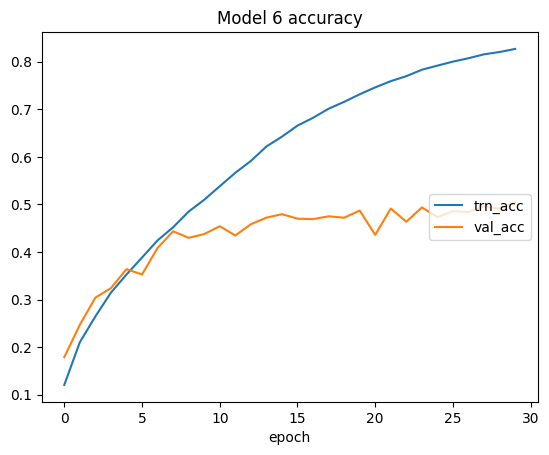

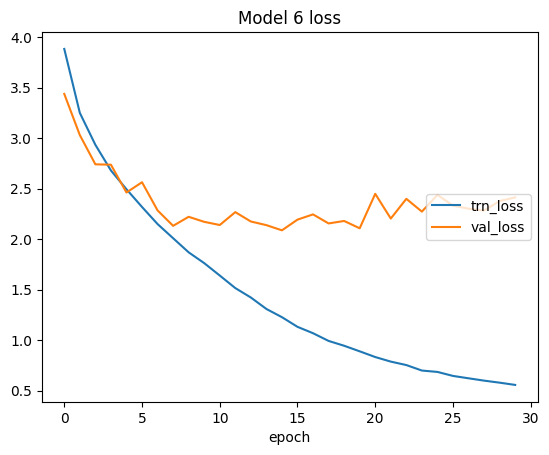

In [20]:
plt.title('Model 6 accuracy')
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('Model 6 loss')
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

---  

### Model 7  

* Use LeakyReLU activation function instead of ReLU

In [32]:
model7 = keras.Sequential()

model7.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Conv2D(filters=512, kernel_size=3, padding='same',
                               activation='relu') )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Flatten())
model7.add(keras.layers.Dropout(0.4))
model7.add(keras.layers.Dense(2048, activation='relu'))
model7.add(keras.layers.Dropout(0.4))
model7.add(keras.layers.Dense(100, activation='softmax'))

model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 2, 2, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2048)                │       1,050,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2048)                │              

 Total params: 2,828,068 (10.79 MB)

 Trainable params: 2,826,084 (10.78 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [34]:
history7 = model7.fit(train_images, train_labels, epochs=30, validation_split=0.20)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.0767 - loss: 4.2795 - val_accuracy: 0.1925 - val_loss: 3.3925
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1811 - loss: 3.3371 - val_accuracy: 0.2312 - val_loss: 3.1252
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2544 - loss: 2.9511 - val_accuracy: 0.2510 - val_loss: 3.0753
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3065 - loss: 2.6687 - val_accuracy: 0.2664 - val_loss: 3.0175
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3507 - loss: 2.4563 - val_accuracy: 0.3079 - val_loss: 2.7971
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3959 - loss: 2.2436 - val_accuracy: 0.3720 - val_loss: 2.4476
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4334 - loss: 2.0677 - val_accuracy: 0.2969 - val_loss: 2.9791
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4630 - loss: 1.9276 -

In [35]:
test_loss, test_acc = model7.evaluate(test_images, test_labels)

print('\nModel 7 loss using test set:', test_loss)
print('\nModel 7 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4538 - loss: 3.2145

Model 7 loss using test set: 3.2060866355895996

Model 7 accuracy using test set: 0.45590001344680786
